In [ ]:
!pip install wfdb
import wfdb
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd 
from scipy.io import loadmat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone  https://github.com/Lauraleortiz04/rep_ECG

fatal: destination path 'rep_ECG' already exists and is not an empty directory.


In [ ]:
path='/content/rep_ECG'


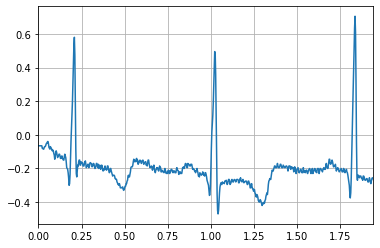

In [ ]:
x = loadmat('/content/rep_ECG/100m.mat') #mencionar la ubicación del archivo 
ecg = (x['val']-0)/200 # sectorizo el vector para que me muestre solo una parte de la señal 
ecg = np.transpose(ecg) #devuelve la matriz con ejes transpuestos
ecg=ecg[:700] 
fs = 360 #frecuencia de muestreo
ts = 1/fs #tiempo de muestreo
t = np.arange(0,len(ecg))*ts #
plt.plot(t,ecg) #imprime gráfica
plt.grid() 
plt.xlim(0, max(t))
plt.show()

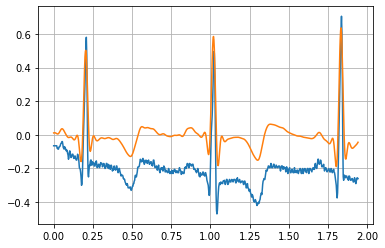

In [ ]:
#FILTRO
sen=ecg 
b,a = signal.butter(N=4, btype = 'bandpass', Wn=[1,25], fs=fs)
ecgfiltr = signal.filtfilt(b, a, sen, axis=0)
plt.plot(t,ecg)
plt.grid()
plt.plot(t, ecgfiltr)
plt.show()

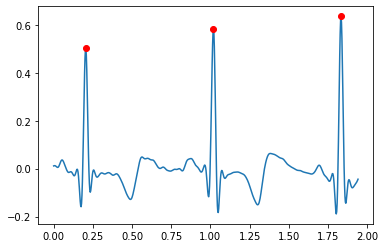

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def detect_peaks(signal, threshold):
    
    peaks = []
    for i in range(1, len(signal) - 1):
        if signal[i] > signal[i - 1] and signal[i] > signal[i + 1] and signal[i] > threshold:
            peaks.append(i)
    return np.array(peaks)

threshold = 0.5 #definición de un umbral
peaks = detect_peaks((ecgfiltr), threshold) #definición de la variable a partir de la función y el umbral

# Imprimir señal
plt.plot(t,ecgfiltr)
plt.plot(peaks*ts,(ecgfiltr)[peaks],"ro") #imprimir la señal marcando los picos maximos 
plt.show()


**ONDA P**

[315, 610]


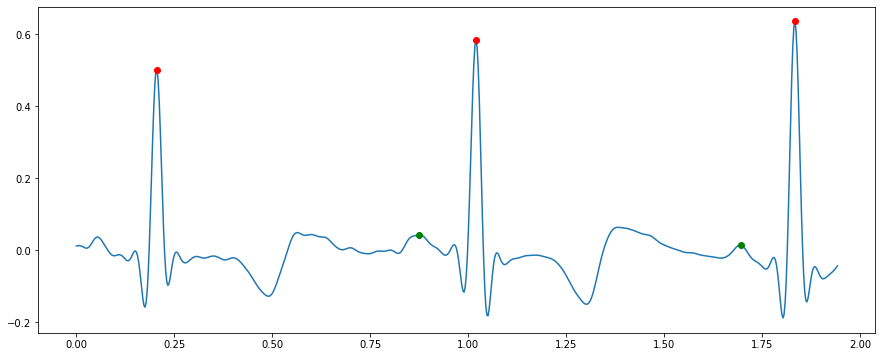

In [ ]:
posmax = []
pos = []
spap=[] #espacio de memoria
for i in range(len(peaks) - 1):
  dpp = peaks[i+1] - peaks[i]
  pto07 = int(dpp*0.7)
  pto09 = int(dpp*0.9)  
  #print(peaks[i],peaks[i+1])
  #print(pto07,pto09)
  ptomin = peaks[i]+pto07
  ptomax = peaks[i]+pto09 
  #print(ptomin,ptomax)
  #print(' ')
  a = ecgfiltr[ptomin:ptomax]
  pos = np.where(a == np.amax(a))[0][0]
  posmax.append(pos+pto07+peaks[i])
  varp=ptomin+np.argmax(a)
  spap.append(varp)

posmaxnp = np.array(posmax)
# Plot the signal and the detected peaks
plt.figure(figsize=[15,6])
plt.plot(t,ecgfiltr)
plt.plot(peaks*ts,(ecgfiltr)[peaks],"ro")
plt.plot(posmaxnp*ts,(ecgfiltr)[posmax],"go")
print(posmax)
plt.show()

In [ ]:
print(len(posmax))

2


In [ ]:
posmaxnp = np.array(posmax)

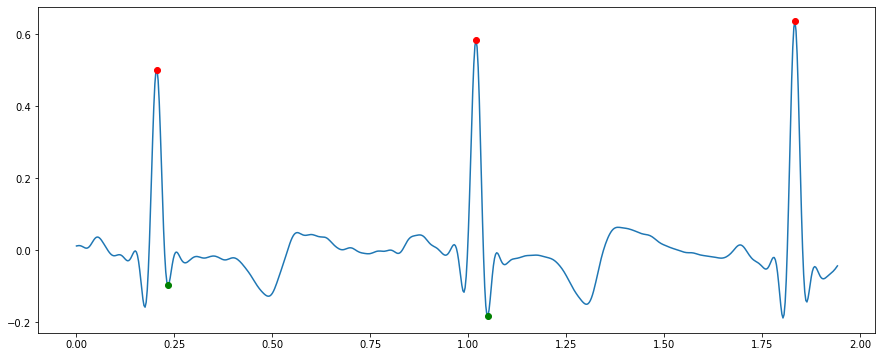

In [ ]:
#ONDA S
posmax_s = []
pos_s = []
for i in range(len(peaks) - 1):
  dpp = peaks[i+1] - peaks[i]
  pto001 = int(dpp*0.01)
  pto01 = int(dpp*0.1)  
  #print(peaks[i],peaks[i+1])
  #print(pto07,pto09)
  ptomin = peaks[i]+pto001
  ptomax = peaks[i]+pto01
  #print(ptomin,ptomax)
  #print(' ')
  a = ecgfiltr[ptomin:ptomax]
  pos_s = np.where(a == np.amin(a))[0][0] 
  # pos_s= min(a)
  posmax_s.append(pos_s+pto001+peaks[i])

posmax_snp = np.array(posmax_s)
# Plot the signal and the detected peaks
plt.figure(figsize=[15,6])
plt.plot(t,ecgfiltr)
plt.plot(peaks*ts,(ecgfiltr)[peaks],"ro")
plt.plot(posmax_snp*ts,(ecgfiltr)[posmax_s],"go")

plt.show()

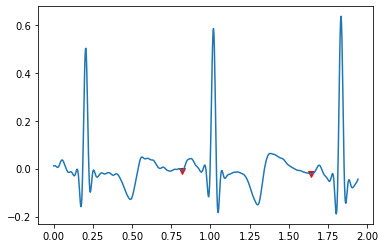

In [ ]:
#ONDA Q
iq=0
picoq=[]
picoqx=[]
tpicoq=[]

while iq < len(posmax):
  dvq=1
  n=0 
  while dvq > 0:
    n+=1
    ubi=posmax[iq]
    dvq=(ecgfiltr[ubi-n+4]-ecgfiltr[ubi-n-4])/8 #cada 8 muestras que va a tocamar la derivada

  voltq=ecgfiltr[posmax[iq]-n]
  picoq.append(ecgfiltr[posmax[iq]-n])
  picoqx.append(posmax[iq]-n)
  timeq=t[posmax[iq]-n]
  tpicoq.append(timeq)
  plt.plot(timeq,voltq,'vr')
  iq+=1


plt.plot(t,ecgfiltr)

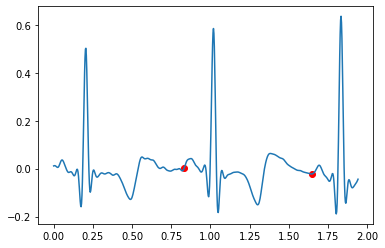

In [ ]:
#INICIO P
ip=0
ubip=[]
tptp =[]
ubipx=[]

for k in spap:
  timep=k
  while timep >= 0.15*ecgfiltr[k]:
    ip+=1
    ran=ecgfiltr[k-ip-2:k-ip+2]
    timep =np.mean(ran)
  ubip.append(ecgfiltr[k-ip])
  tptp.append(t[k-ip])
  ubipx.append(k-ip)

plt.plot(tptp,ubip, 'or')
plt.plot(t,ecgfiltr)


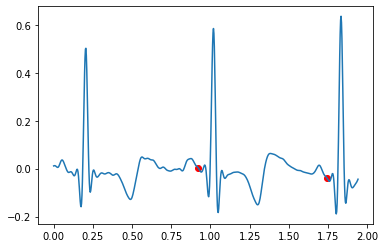

In [ ]:
#FIN P
eubip=[]
tptpe =[]
eubipx=[]

for k in spap:
  timep=k
  while timep >= 0.15*ecgfiltr[k]:
    ip+=1
    ran=ecgfiltr[k-ip-2:k-ip+2]
    timep =np.mean(ran)
  eubip.append(ecgfiltr[k+ip])
  tptpe.append(t[k+ip])
  eubipx.append(k+ip)

plt.plot(tptpe,eubip, 'or')
plt.plot(t,ecgfiltr)


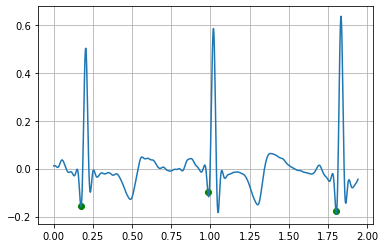

In [ ]:
pq=0
qpicv=[]
qposx=[]
qt=[]
for R in peaks:
  dq=1 # la derivada de q
  h=0 # contador
  while dq > 0:
    h+=1
    dq=(ecgfiltr[R-h+4]-ecgfiltr[R-h-4])/8
  qpicv.append(ecgfiltr[R-h])
  qposx.append(R-h)
  qt.append(t[R-h])

plt.plot(qt,qpicv,'og')  
plt.plot(t,ecgfiltr)
plt.grid()

In [ ]:
ondaph=[]
ondapL=[]
segmentopr=[]
HRV=[]
TareaondaP=[]
QrelectricaAltr=[]
areap=[]
urng=(len(posmax))
a=0
ar=1
k=0
h=0
for ex in u:
  ondaph.append([ex])
  ondapL.append(tptp[ex]-timep[ex])
  for ig in range(ubipx[ex],ubipx[ex]):
    g=((yfilt[ig]+yfilt[ig+1)/fs])
    h+=g
  areap.append(h/2)
  h=0

  HRV.append(round(60/(maxit[ex+1]-maxit[ex])))
  QrelectricaAltr.append(maxiy[ex]-qpicos[ex])


SyntaxError: ignored